In [19]:
from datetime import datetime

%matplotlib inline
import matplotlib
import backtrader as bt
import backtrader.analyzers as btanalyzers


class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(pfast=10, pslow=25)  # period for the fast moving average  # period for the slow moving average

    def __init__(self):
        sma1 = bt.ind.SmoothedMovingAverage(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SmoothedMovingAverage(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


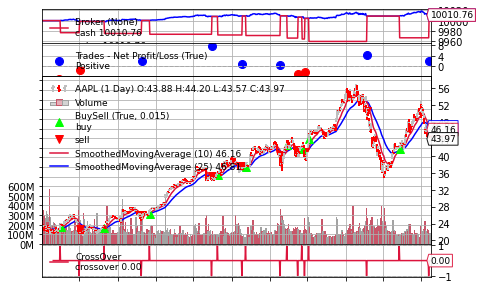

[[<Figure size 432x288 with 5 Axes>]]

In [20]:
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.YahooFinanceData(dataname="AAPL", fromdate=datetime(2016, 1, 1), todate=datetime(2019, 5, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot(style='bar', iplot=False)  # and plot it with a single command


In [21]:
# Analyzer
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name="mysharpe")

the_stats = cerebro.run()
the_stat = the_stats[0]

print("Sharpe Ratio:", the_stat.analyzers.mysharpe.get_analysis())

Sharpe Ratio: OrderedDict([('sharperatio', -19.08067704242238)])
